In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
chess = pd.read_csv('games.csv')

In [4]:
chess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:
chess['opening_eco'].value_counts()


A00    1007
C00     844
D00     739
B01     716
C41     691
       ... 
A24       1
D19       1
C83       1
C09       1
D22       1
Name: opening_eco, Length: 365, dtype: int64

In [6]:
chess['opening_name'].value_counts()

Van't Kruijs Opening                                                368
Sicilian Defense                                                    358
Sicilian Defense: Bowdler Attack                                    296
French Defense: Knight Variation                                    271
Scotch Game                                                         271
                                                                   ... 
Scandinavian Defense: Anderssen Counterattack |  Goteborg System      1
Ruy Lopez: Schliemann Defense |  Tartakower Variation                 1
King's Gambit Accepted |  Greco Gambit                                1
King's Indian Defense: Orthodox Variation |  Ukrainian Defense        1
Italian Game: Evans Gambit Declined |  Cordel Variation               1
Name: opening_name, Length: 1477, dtype: int64

In [66]:
winner_rating = pd.DataFrame(chess['winner'])
winner_rating.replace(to_replace='draw',value='white')
winner_rating = winner_rating+'_id'
winner_rating=winner_rating.values.tolist()
chess.count()[0]

20058

In [70]:
chess = chess.assign(winner_rating=pd.Series(np.random.randn(chess.count()[0])).values)
for i in range(chess.count()[0]):
    if chess['winner'][i] == 'black':
        chess['winner_rating'][i] = chess['black_rating'][i]
    elif chess['winner'][i] == 'white':
        chess['winner_rating'][i] = chess['white_rating'][i]
    else:
        chess['winner_rating'][i] = 0.5*(chess['black_rating'][i]+chess['white_rating'][i])

In [8]:
chess_op = chess.groupby('opening_eco')
chess_op.count()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_name,opening_ply
opening_eco,,,,,,,,,,,,,,,
A00,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007,1007
A01,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164
A02,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
A03,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
A04,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E92,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
E94,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
E95,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [22]:
all_eco = chess['opening_eco'].unique()

In [113]:
openings_stat = pd.DataFrame(columns=['number_of_players_min','number_of_players_max','number_of_players_mean','number_of_players_count','winner_rating_min','winner_rating_max','winner_rating_mean','winner_rating_count'])
openings_stat2 = pd.DataFrame()
for eco in all_eco:
    eco_number_of_players = chess[chess['opening_eco']== eco]['id'].value_counts()
    eco_number_of_players_min = eco_number_of_players.min()
    eco_number_of_players_max = eco_number_of_players.max()
    eco_number_of_players_mean = eco_number_of_players.mean()
    eco_number_of_players_count = eco_number_of_players.count()
    eco_winner_rating = chess[chess['opening_eco']== eco]['winner_rating']
    eco_winner_rating_min = eco_winner_rating.min()
    eco_winner_rating_max = eco_winner_rating.max()
    eco_winner_rating_mean = eco_winner_rating.mean()
    eco_winner_rating_count = eco_winner_rating.count()
    eco_winner_color_white_number = chess[chess['opening_eco']== 'A00'][chess['winner']=='white'].shape[0]
    eco_winner_color_draw_number = chess[chess['opening_eco']== 'A00'][chess['winner']=='draw'].shape[0]
    eco_df = pd.DataFrame([[eco_number_of_players_min,eco_number_of_players_max,eco_number_of_players_mean,eco_number_of_players_count,eco_winner_rating_min,eco_winner_rating_max,eco_winner_rating_mean,eco_winner_rating_count]],columns=['number_of_players_min','number_of_players_max','number_of_players_mean','number_of_players_count','winner_rating_min','winner_rating_max','winner_rating_mean','winner_rating_count'])
    openings_stat=openings_stat.append(eco_df,ignore_index=True)
    #openings_stat2.insert(2,eco,eco)
        

In [105]:
eco_df = pd.DataFrame([[eco_number_of_players_min,eco_number_of_players_max,eco_number_of_players_mean,eco_number_of_players_count,eco_winner_rating_min,eco_winner_rating_max,eco_winner_rating_mean,eco_winner_rating_count]],columns=['number_of_players_min','number_of_players_max','number_of_players_mean','number_of_players_count','winner_rating_min','winner_rating_max','winner_rating_mean','winner_rating_count'])

In [114]:
openings_stat

,number_of_players_min,number_of_players_max,number_of_players_mean,number_of_players_count,winner_rating_min,winner_rating_max,winner_rating_mean,winner_rating_count
0,1,3,1.037736,106,1015.0,2101.0,1651.681818,110
1,1,2,1.064460,574,884.0,2622.0,1558.022095,611
2,1,3,1.044892,646,813.0,2296.0,1440.011111,675
3,1,2,1.053398,412,1020.0,2340.0,1687.943548,434
4,1,4,1.063077,650,898.0,2270.0,1552.452967,691
...,...,...,...,...,...,...,...,...
360,1,1,1.000000,1,1989.0,1989.0,1989.000000,1
361,1,1,1.000000,1,1884.5,1884.5,1884.500000,1
362,1,1,1.000000,1,1539.0,1539.0,1539.000000,1
363,1,1,1.000000,1,2091.0,2091.0,2091.000000,1


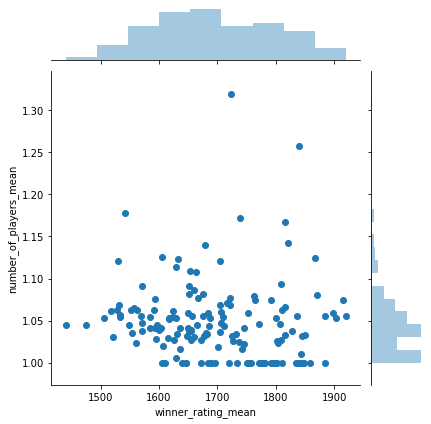

In [124]:
sns.jointplot(x='winner_rating_mean',y='number_of_players_mean',data=openings_stat[openings_stat['number_of_players_count']>15],kind='scatter')

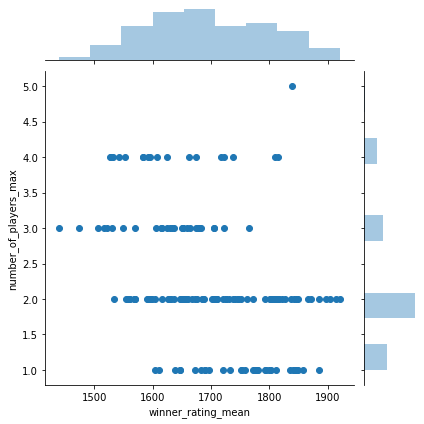

In [125]:
sns.jointplot(x='winner_rating_mean',y='number_of_players_max',data=openings_stat[openings_stat['number_of_players_count']>15],kind='scatter')